Tema2 SPG
Lidia Istrate 342C4

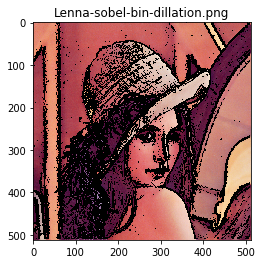

In [14]:
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_name_extension = "Lenna.png"
image_name = "Lenna"


image = np.array(Image.open(image_name_extension)).astype(np.uint8)


threshold = 120

def get_sobel_image(image):
    
    matrix_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    matrix_sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])


    if len(image.shape) == 3:
        height, width, channels = image.shape

        rgb_image_sobel = np.zeros((height, width, channels))

        for channel in range(channels):
            for i in range(1, height - 1):
                for j in range(1, width - 1): 
                    g_x = (matrix_sobel_x[0, 0] * image[i - 1, j - 1, channel]) + \
                                (matrix_sobel_x[0, 1] * image[i - 1, j, channel]) + \
                                (matrix_sobel_x[0, 2] * image[i - 1, j + 1, channel]) + \
                                (matrix_sobel_x[1, 0] * image[i, j - 1, channel]) + \
                                (matrix_sobel_x[1, 1] * image[i, j, channel]) + \
                                (matrix_sobel_x[1, 2] * image[i, j + 1, channel]) + \
                                (matrix_sobel_x[2, 0] * image[i + 1, j - 1, channel]) + \
                                (matrix_sobel_x[2, 1] * image[i + 1, j, channel]) + \
                                (matrix_sobel_x[2, 2] * image[i + 1, j + 1, channel])

                    g_y = (matrix_sobel_y[0, 0] * image[i - 1, j - 1, channel]) + \
                                (matrix_sobel_y[0, 1] * image[i - 1, j, channel]) + \
                                (matrix_sobel_y[0, 2] * image[i - 1, j + 1, channel]) + \
                                (matrix_sobel_y[1, 0] * image[i, j - 1, channel]) + \
                                (matrix_sobel_y[1, 1] * image[i, j, channel]) + \
                                (matrix_sobel_y[1, 2] * image[i, j + 1, channel]) + \
                                (matrix_sobel_y[2, 0] * image[i + 1, j - 1, channel]) + \
                                (matrix_sobel_y[2, 1] * image[i + 1, j, channel]) + \
                                (matrix_sobel_y[2, 2] * image[i + 1, j + 1, channel])


                    rgb_image_sobel[i - 1, j - 1, channel] = np.sqrt(pow(g_x, 2.0) + pow(g_y, 2.0))

        image_after_sobel = rgb_image_sobel[:,:,0] + rgb_image_sobel[:,:,1] + rgb_image_sobel[:,:,2]

    else:
        height, width = image.shape

        one_image_sobel = np.zeros((height, width))

        for i in range(1, height - 1):
            for j in range(1, width - 1):
                g_x = (matrix_sobel_x[0, 0] * image[i - 1, j - 1]) + \
                            (matrix_sobel_x[0, 1] * image[i - 1, j]) + \
                            (matrix_sobel_x[0, 2] * image[i - 1, j + 1]) + \
                            (matrix_sobel_x[1, 0] * image[i, j - 1]) + \
                            (matrix_sobel_x[1, 1] * image[i, j]) + \
                            (matrix_sobel_x[1, 2] * image[i, j + 1]) + \
                            (matrix_sobel_x[2, 0] * image[i + 1, j - 1]) + \
                            (matrix_sobel_x[2, 1] * image[i + 1, j]) + \
                            (matrix_sobel_x[2, 2] * image[i + 1, j + 1])

                g_y = (matrix_sobel_y[0, 0] * image[i - 1, j - 1]) + \
                            (matrix_sobel_y[0, 1] * image[i - 1, j]) + \
                            (matrix_sobel_y[0, 2] * image[i - 1, j + 1]) + \
                            (matrix_sobel_y[1, 0] * image[i, j - 1]) + \
                            (matrix_sobel_y[1, 1] * image[i, j]) + \
                            (matrix_sobel_y[1, 2] * image[i, j + 1]) + \
                            (matrix_sobel_y[2, 0] * image[i + 1, j - 1]) + \
                            (matrix_sobel_y[2, 1] * image[i + 1, j]) + \
                            (matrix_sobel_y[2, 2] * image[i + 1, j + 1])

                one_image_sobel[i - 1, j - 1] = np.sqrt(pow(g_x, 2.0) + pow(g_y, 2.0))

        image_after_sobel = one_image_sobel[:,:]
        
    return image_after_sobel

def get_binarisation_image(threshold, image):

    image_after_sobel = get_sobel_image(image)

    height, width = image_after_sobel.shape

    for i in range(0, height):
        for j in range(0, width):
            if image_after_sobel[i, j] < threshold:
                image_after_sobel[i, j] = 0
            else:
                image_after_sobel[i, j] = 255
                
    return image_after_sobel

def get_dillation_image(threshold, image):
    binarisation_image = get_binarisation_image(threshold, image)
    
    height, width, channels = image.shape
    dillation_image = image.copy()
    
    height, width = binarisation_image.shape
    
    for i in range(0, height):
        for j in range(0, width):
            if binarisation_image[i, j] == 255:
                for channel in range(channels):
                    dillation_image[i, j, channel] = 0
    return dillation_image    

dillation_image = get_dillation_image(threshold, image)

plt.figure()
plt.title(image_name + '-sobel-bin-dillation.png')
plt.imsave(image_name + '-sobel-bin-dillation.png', dillation_image, format='png')
plt.imshow(dillation_image)
plt.show()